In [1]:
from sklearn.decomposition import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.manifold import *
from umap import UMAP
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('ridge_regression_coefficients_all_countries_1.csv', index_col = 0)

In [4]:
df.head()

,Best Alpha,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Test_Score,Export_GDP_Correlation
Country,,,,,,,
BDI,1.00,0.000029,-0.000012,0.000768,0.000193,0.897245,0.733187
BFA,0.01,0.008378,-0.002112,0.002632,0.003396,0.948382,0.965271
BGD,0.01,-0.033748,-0.054874,0.121161,-0.092928,0.760980,0.943384
BHR,0.01,0.007416,-0.017012,0.008333,0.015543,0.908715,0.956755
BHS,0.01,0.000797,-0.010752,0.004344,-0.002682,0.804500,-0.572004


In [6]:
df.drop(columns = ['Best Alpha', 'Test_Score', 'Export_GDP_Correlation'], inplace = True)

In [7]:
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
BDI,2.920203e-05,-0.000012,0.000768,0.000193
BFA,8.378268e-03,-0.002112,0.002632,0.003396
BGD,-3.374759e-02,-0.054874,0.121161,-0.092928
BHR,7.415942e-03,-0.017012,0.008333,0.015543
BHS,7.972321e-04,-0.010752,0.004344,-0.002682
...,...,...,...,...
VCT,-4.872461e-08,-0.000142,0.000312,-0.000051
VUT,2.999964e-05,-0.000333,0.000295,0.000097
WSM,3.140876e-06,0.000032,0.000338,-0.000045


# Standard Scaler for each row 

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.T).T

In [9]:
df_scaled = pd.DataFrame(df_scaled, index = df.index, columns = df.columns)
df_scaled


,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
BDI,-0.691131,-0.822769,1.678753,-0.164853
BFA,1.426303,-1.394281,-0.118794,0.086772
BGD,-0.228904,-0.488196,1.672352,-0.955253
BHR,0.312866,-1.674308,0.387427,0.974016
BHS,0.513294,-1.551808,1.147416,-0.108902
...,...,...,...,...
VCT,-0.172800,-1.006189,1.653148,-0.474158
VUT,0.034426,-1.564224,1.201865,0.327933
WSM,-0.525168,-0.331541,1.702580,-0.845872


In [10]:
df = df_scaled
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
BDI,-0.691131,-0.822769,1.678753,-0.164853
BFA,1.426303,-1.394281,-0.118794,0.086772
BGD,-0.228904,-0.488196,1.672352,-0.955253
BHR,0.312866,-1.674308,0.387427,0.974016
BHS,0.513294,-1.551808,1.147416,-0.108902
...,...,...,...,...
VCT,-0.172800,-1.006189,1.653148,-0.474158
VUT,0.034426,-1.564224,1.201865,0.327933
WSM,-0.525168,-0.331541,1.702580,-0.845872


# KMeans clustering for Coefficients 

In [11]:
df_coef = df.copy()

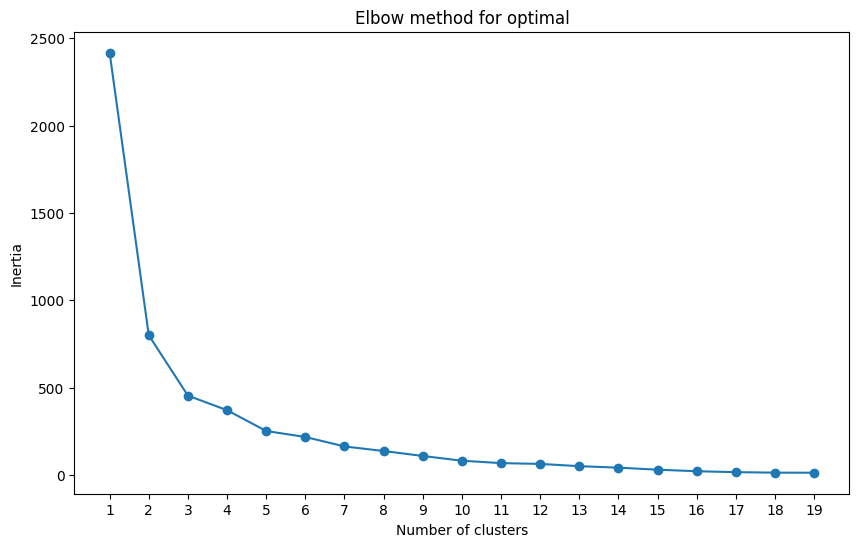

In [57]:
from sklearn.cluster import KMeans
inertia_values = []

cluster_range = range(1, 20)
for k in cluster_range:
    model = KMeans(n_clusters=k, n_init='auto', random_state=42)
    model.fit(df_coef)
    inertia_values.append(model.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal')
plt.xticks(cluster_range)
plt.show()

In [54]:
n_clusters = 19
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_coef['Cluster'] = kmeans.fit_predict(df_coef)

In [55]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_coef.drop(columns=['Cluster']), df_coef['Cluster'])
print("Silhouette Score:", ((sil_score + 1) / 2) * 100)

Silhouette Score: 67.48516897100878


In [56]:
df_coef.Cluster.value_counts()

Cluster
2     11
6     10
10    10
4      7
14     6
8      6
5      5
12     5
17     5
9      5
15     4
1      4
0      3
11     3
3      2
13     2
7      2
18     1
16     1
Name: count, dtype: int64

# Dimensionality Reduction

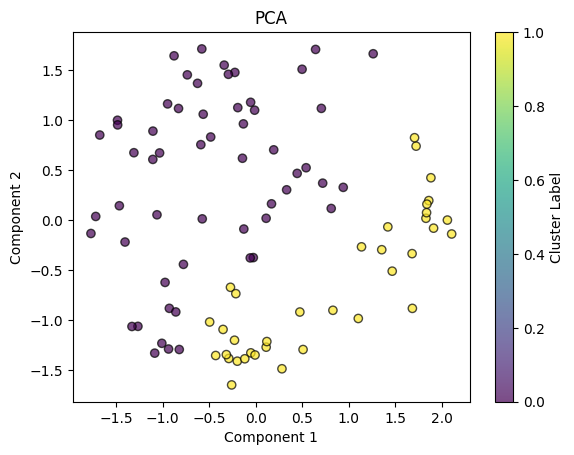

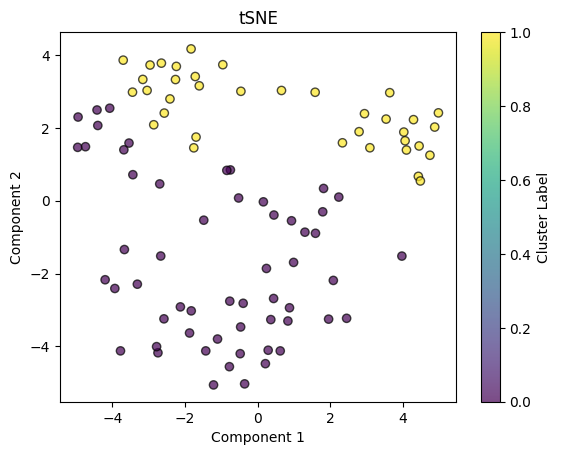

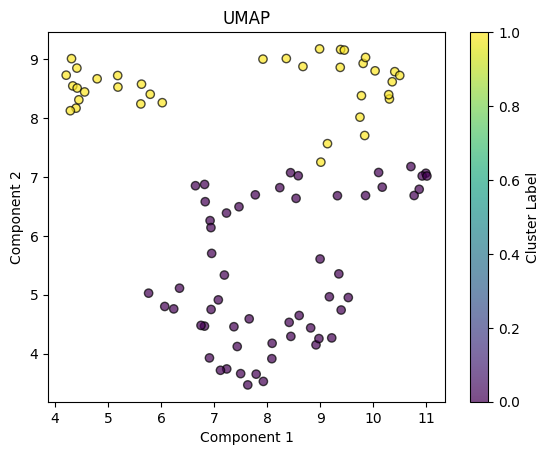

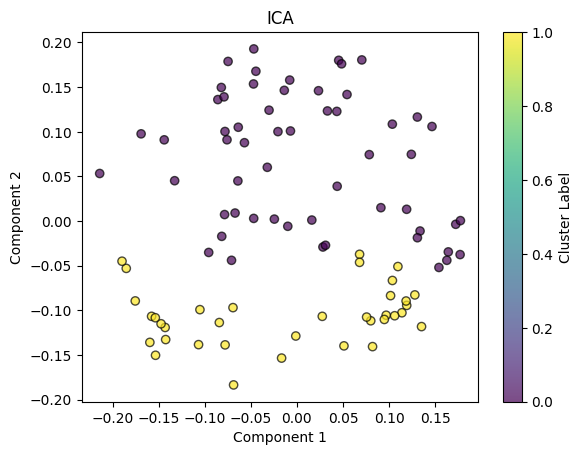

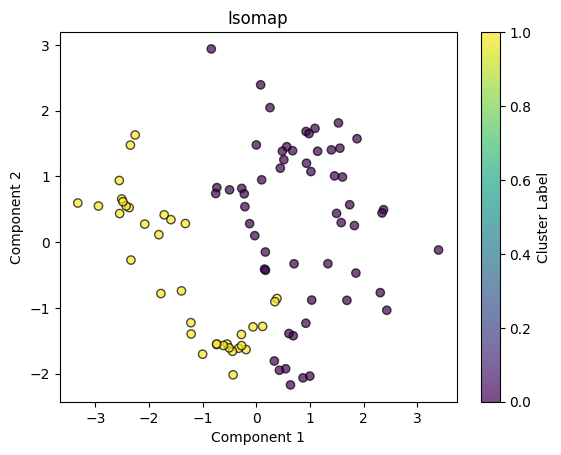

In [30]:

def visualize_dim_red(name, alg, data, clusters):
    al = alg(n_components=2)
    tr = al.fit_transform(data)

    plt.scatter(tr[:, 0], tr[:, 1], c=clusters, cmap='viridis', alpha=0.7, edgecolors='k')

    plt.title(name)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(label="Cluster Label")
    plt.show()

algs = {'PCA': PCA, 'tSNE': TSNE, 'UMAP': UMAP, 'ICA': FastICA, 'Isomap': Isomap}

 
clusters = df_coef['Cluster']


df_features = df_coef.drop(columns=['Cluster'])


for name, alg in algs.items():
    visualize_dim_red(name, alg, df_features, clusters)


In [31]:
df

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff
Country,,,,
BDI,-0.691131,-0.822769,1.678753,-0.164853
BFA,1.426303,-1.394281,-0.118794,0.086772
BGD,-0.228904,-0.488196,1.672352,-0.955253
BHR,0.312866,-1.674308,0.387427,0.974016
BHS,0.513294,-1.551808,1.147416,-0.108902
...,...,...,...,...
VCT,-0.172800,-1.006189,1.653148,-0.474158
VUT,0.034426,-1.564224,1.201865,0.327933
WSM,-0.525168,-0.331541,1.702580,-0.845872


In [32]:
df_coef

,Population_Coeff,Inflation_Coeff,Import_Coeff,Export_Coeff,Cluster
Country,,,,,
BDI,-0.691131,-0.822769,1.678753,-0.164853,1
BFA,1.426303,-1.394281,-0.118794,0.086772,0
BGD,-0.228904,-0.488196,1.672352,-0.955253,0
BHR,0.312866,-1.674308,0.387427,0.974016,0
BHS,0.513294,-1.551808,1.147416,-0.108902,0
...,...,...,...,...,...
VCT,-0.172800,-1.006189,1.653148,-0.474158,0
VUT,0.034426,-1.564224,1.201865,0.327933,0
WSM,-0.525168,-0.331541,1.702580,-0.845872,0


In [19]:
df_coef.to_csv('clustered_data.csv')

# Cluster Dimentionality reduction of PCA

In [20]:
pca = PCA(0.95)
df_pca = pca.fit_transform(df)
df_pca

array([[-4.31049551e-01, -1.35609337e+00,  7.47965162e-02],
       [-2.24814977e-01,  1.47998543e+00, -6.22052597e-02],
       [-1.26721579e+00, -1.06400324e+00,  4.82075221e-01],
       [ 7.19490440e-01,  3.70682365e-01, -5.51443563e-01],
       [-5.75555549e-01,  1.27946571e-02, -5.35818204e-01],
       [-1.00990543e+00, -1.23397463e+00,  3.58664926e-01],
       [-1.77249393e+00, -1.33673898e-01,  7.36900172e-01],
       [-3.51912211e-01, -1.09496864e+00, -2.00306299e-01],
       [-2.90102785e-01, -1.38600414e+00,  5.57793930e-02],
       [ 5.08499053e-01, -1.29632683e+00, -4.82748423e-02],
       [-2.63780870e-02, -3.75349449e-01, -6.01680672e-01],
       [ 5.41102816e-01,  5.25020522e-01, -5.70424288e-01],
       [-1.93359799e-01,  1.12733763e+00, -3.45896100e-01],
       [-5.65259377e-01,  1.06121211e+00, -2.72892775e-01],
       [ 2.06034145e+00,  6.49551445e-04,  8.53780568e-01],
       [-5.80283019e-01,  1.71541490e+00,  4.00691313e-01],
       [-8.78644062e-01,  1.64629006e+00

In [21]:
df_pca = pd.DataFrame(df_pca, columns = ['Component 1', 'Component 2', 'Component 3'], index = df.index)
df_pca

,Component 1,Component 2,Component 3
Country,,,
BDI,-0.431050,-1.356093,0.074797
BFA,-0.224815,1.479985,-0.062205
BGD,-1.267216,-1.064003,0.482075
BHR,0.719490,0.370682,-0.551444
BHS,-0.575556,0.012795,-0.535818
...,...,...,...
VCT,-0.860016,-0.919670,-0.080634
VUT,-0.059553,-0.378514,-0.598090
WSM,-1.086547,-1.332442,0.625221


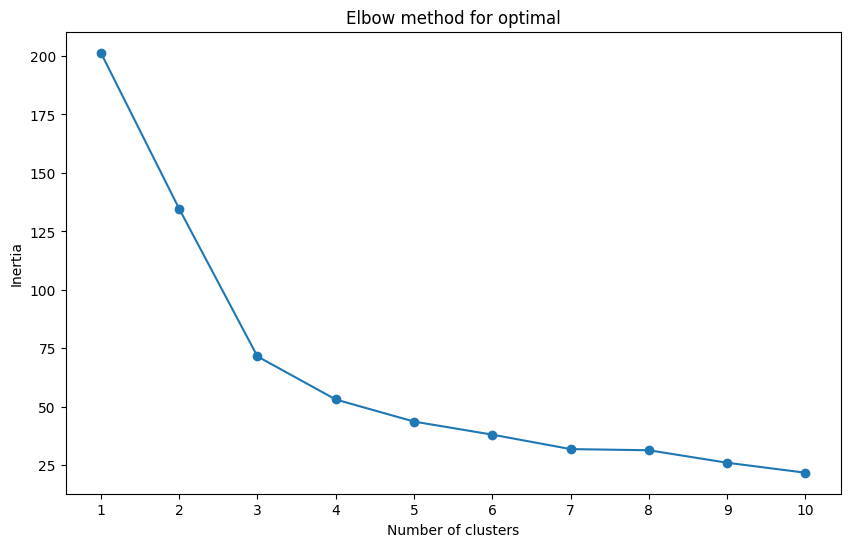

In [58]:
from sklearn.cluster import KMeans
inertia_values = []

cluster_range = range(1, 11)
for k in cluster_range:
    model = KMeans(n_clusters=k, n_init='auto', random_state=42)
    model.fit(df_pca)
    inertia_values.append(model.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal')
plt.xticks(cluster_range)
plt.show()

In [59]:
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

In [60]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df_pca.drop(columns=['Cluster']), df_pca['Cluster'])
print("Silhouette Score:", ((sil_score + 1) / 2) * 100)

Silhouette Score: 70.27381477600258


In [61]:
df_pca.Cluster.value_counts()

Cluster
3    20
5    16
2    16
0    14
1    12
6    10
4     4
Name: count, dtype: int64

In [62]:
df_pca

,Component 1,Component 2,Component 3,Cluster
Country,,,,
BDI,-0.431050,-1.356093,0.074797,3
BFA,-0.224815,1.479985,-0.062205,5
BGD,-1.267216,-1.064003,0.482075,6
BHR,0.719490,0.370682,-0.551444,0
BHS,-0.575556,0.012795,-0.535818,0
...,...,...,...,...
VCT,-0.860016,-0.919670,-0.080634,6
VUT,-0.059553,-0.378514,-0.598090,0
WSM,-1.086547,-1.332442,0.625221,6


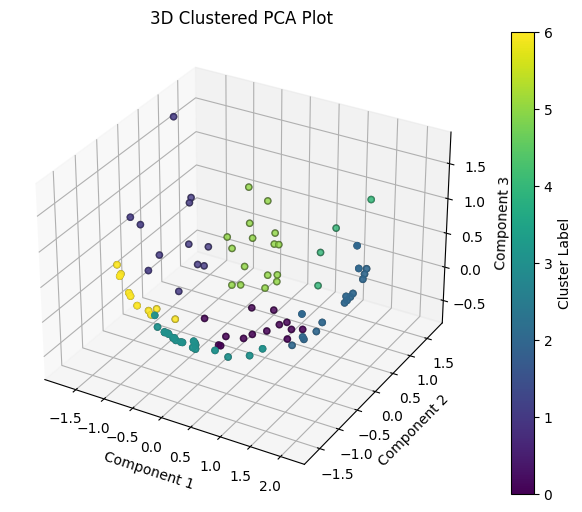

In [63]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], 
           c=df_pca['Cluster'], cmap='viridis', alpha=0.7, edgecolors='k')


ax.set_title("3D Clustered PCA Plot")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")

cbar = plt.colorbar(ax.scatter(df_pca.iloc[:, 0], df_pca.iloc[:, 1], df_pca.iloc[:, 2], 
                               c=df_pca['Cluster'], cmap='viridis'))
cbar.set_label("Cluster Label")

plt.show()


In [64]:
df_pca.to_csv('clustered_data_pca.csv')

# Cluster Dimentionality reduction of UMAP

In [65]:
umap = UMAP(n_components = 3, random_state = 42)
df_umap = umap.fit_transform(df)
df_umap

array([[9.112035 , 3.105799 , 7.5657105],
       [4.6818643, 5.2234583, 8.328168 ],
       [8.495317 , 2.5806687, 8.5570545],
       [6.7166476, 5.595267 , 6.8728175],
       [6.973897 , 4.0577774, 7.878721 ],
       [8.550007 , 2.5545707, 8.316279 ],
       [5.4563713, 3.039855 , 9.251359 ],
       [8.753241 , 3.6253822, 7.5253882],
       [9.291811 , 3.413891 , 7.54345  ],
       [9.509902 , 4.2788906, 6.639388 ],
       [7.3647614, 4.227561 , 7.627558 ],
       [6.310211 , 5.6576886, 7.0255985],
       [4.908691 , 5.327451 , 8.103905 ],
       [5.1309285, 4.78838  , 8.344311 ],
       [8.103643 , 7.1942205, 4.8391685],
       [4.3933825, 4.732873 , 8.782241 ],
       [4.5303497, 4.5577936, 8.969988 ],
       [8.26786  , 6.9748297, 5.103778 ],
       [5.3601885, 5.3079443, 8.055647 ],
       [9.539393 , 3.4291425, 7.4634075],
       [9.456211 , 3.7535148, 7.167114 ],
       [7.0859485, 4.4281483, 7.573822 ],
       [6.7757583, 5.7645116, 6.702085 ],
       [5.3190527, 4.9386697, 8.16

In [66]:
df_umap = pd.DataFrame(df_umap, columns = ['Component 1', 'Component 2', 'Component 3'], index = df.index)

In [67]:
df_umap

,Component 1,Component 2,Component 3
Country,,,
BDI,9.112035,3.105799,7.565711
BFA,4.681864,5.223458,8.328168
BGD,8.495317,2.580669,8.557055
BHR,6.716648,5.595267,6.872818
BHS,6.973897,4.057777,7.878721
...,...,...,...
VCT,8.200418,3.084138,8.026928
VUT,7.416635,4.258274,7.678929
WSM,8.742350,2.420657,8.330930


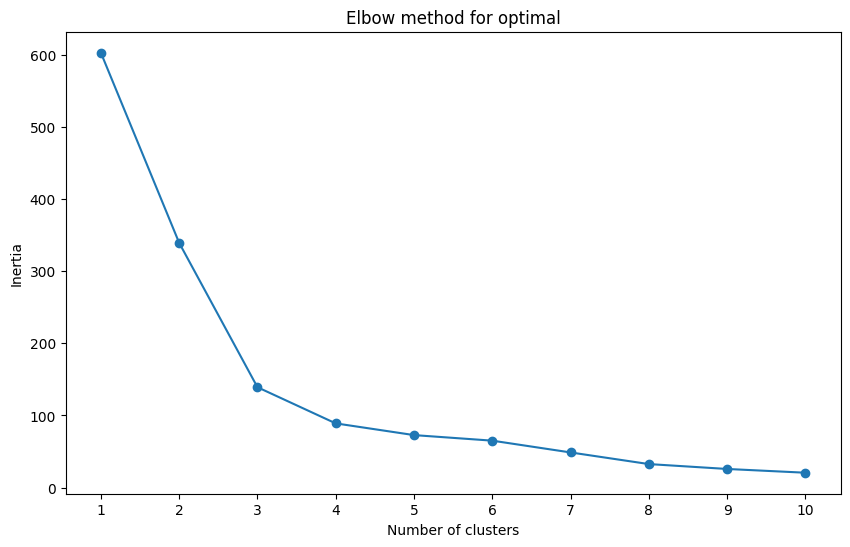

In [68]:
inertia_values = []
cluster_range = range(1,11)
for k in cluster_range:
    model = KMeans(n_clusters = k, n_init='auto', random_state=42)
    model.fit_transform(df_umap)
    inertia_values.append(model.inertia_)
    
    
plt.figure(figsize = (10, 6))
plt.plot(cluster_range, inertia_values, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal')
plt.xticks(cluster_range)
plt.show()

In [69]:
n_cluster = 7
kmeans = KMeans(n_clusters = n_cluster, n_init='auto', random_state = 42)
df_umap['cluster'] = kmeans.fit_predict(df_umap)

In [70]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_umap.drop(columns = ['cluster']), df_umap['cluster'])
print('silhouette score:', ((sil_score + 1)/2)* 100)

silhouette score: 72.47582972049713


In [71]:
df_umap.cluster.value_counts()

cluster
2    22
3    18
0    15
4    10
5    10
6     9
1     8
Name: count, dtype: int64

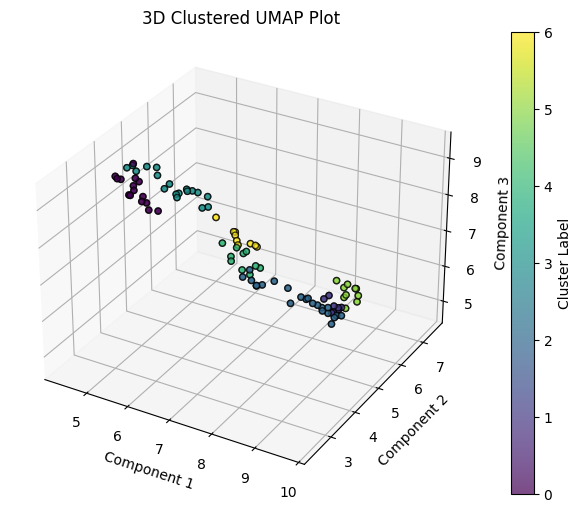

In [72]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df_umap.iloc[:,0], df_umap.iloc[:,1], df_umap.iloc[:,2], c = df_umap['cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k')

cbar = plt.colorbar(ax.scatter(df_umap.iloc[:,0], df_umap.iloc[:,1], df_umap.iloc[:,2], c = df_umap['cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k'))
cbar.set_label('Cluster Label')


ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Clustered UMAP Plot')

plt.show()

In [73]:
df_umap.to_csv('clustered_data_umap.csv')

# Cluster dimentionality reduction of Isomap

In [74]:
isomap = Isomap(n_components=3) 
df_isomap = isomap.fit_transform(df)
df_isomap

array([[-1.92099662e-01, -1.63457499e+00,  1.67028978e-02],
       [ 9.25817871e-01,  1.68252553e+00,  1.64946728e-01],
       [ 8.68859530e-01, -2.06537810e+00,  8.97454744e-01],
       [-4.99203392e-01,  7.94917344e-01, -6.41879111e-01],
       [ 7.02126248e-01, -3.29682595e-01, -5.23171771e-01],
       [ 5.46415702e-01, -1.92703695e+00,  5.48394533e-01],
       [ 2.42991047e+00, -1.03708967e+00,  1.45445542e-01],
       [-6.21992795e-02, -1.28957327e+00, -2.47053060e-01],
       [-3.30577481e-01, -1.61568495e+00,  3.62099763e-02],
       [-1.21469433e+00, -1.39766759e+00,  1.11457767e-01],
       [ 1.52737920e-01, -4.11088906e-01, -8.82955120e-01],
       [-2.71801866e-01,  8.16801877e-01, -6.17528106e-01],
       [ 6.75165681e-01,  1.39027618e+00, -2.83132477e-01],
       [ 1.14158333e+00,  1.38203924e+00, -1.80601618e-02],
       [-2.94263591e+00,  5.48639526e-01,  1.13219114e-01],
       [ 1.52920123e+00,  1.81270105e+00,  5.39027179e-01],
       [ 1.87572133e+00,  1.57247776e+00

In [75]:
df_isomap = pd.DataFrame(df_isomap, columns = ['Component 1', 'Component 2', 'Component 3'], index = df.index)

In [76]:
df_isomap

,Component 1,Component 2,Component 3
Country,,,
BDI,-0.192100,-1.634575,0.016703
BFA,0.925818,1.682526,0.164947
BGD,0.868860,-2.065378,0.897455
BHR,-0.499203,0.794917,-0.641879
BHS,0.702126,-0.329683,-0.523172
...,...,...,...
VCT,0.606665,-1.390791,0.020025
VUT,0.170230,-0.428778,-0.870160
WSM,0.635376,-2.172716,0.678763


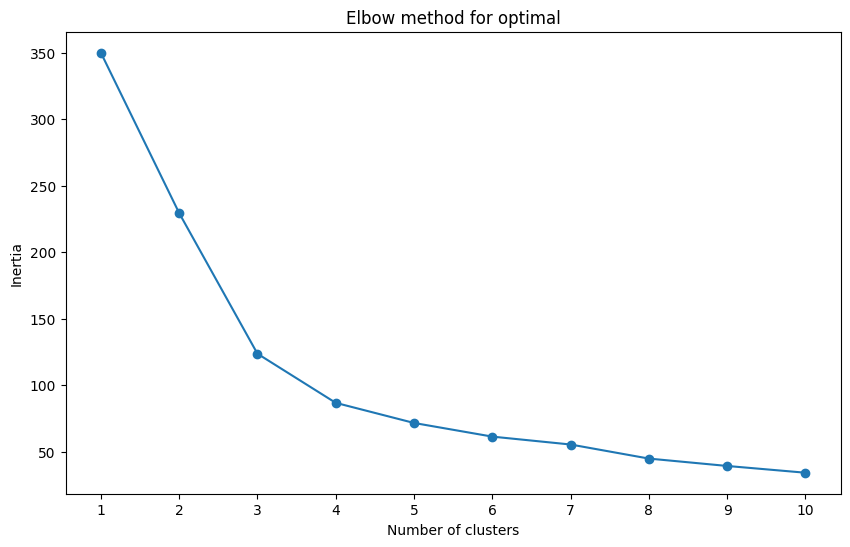

In [77]:
inertia_values = []
cluster_range = range(1,11)
for k in cluster_range:
    model = KMeans(n_clusters = k, n_init='auto', random_state=42)
    model.fit_transform(df_isomap)
    inertia_values.append(model.inertia_)
    
    
plt.figure(figsize = (10, 6))
plt.plot(cluster_range, inertia_values, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal')
plt.xticks(cluster_range)
plt.show()

In [78]:
n_cluster = 7
kmeans = KMeans(n_clusters = n_cluster, n_init='auto', random_state = 42)
df_isomap['cluster'] = kmeans.fit_predict(df_isomap)

In [79]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(df_isomap.drop(columns = ['cluster']), df_isomap['cluster'])
print('silhouette score:', ((sil_score + 1)/2)* 100)

silhouette score: 69.58289493431906


In [80]:
df_isomap.cluster.value_counts()

cluster
2    22
6    16
0    16
3    12
5    10
4     8
1     8
Name: count, dtype: int64

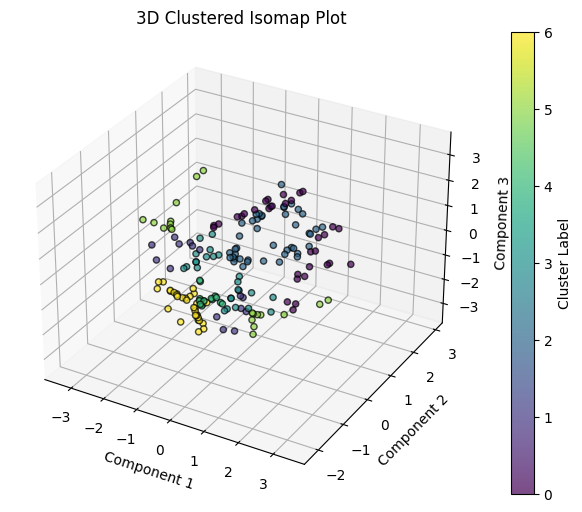

In [81]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(df_isomap.iloc[:,2], df_isomap.iloc[:,1], df_isomap.iloc[:,0], c = df_isomap['cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k')

cbar = plt.colorbar(ax.scatter(df_isomap.iloc[:,0], df_isomap.iloc[:,1], df_isomap.iloc[:,2], c = df_isomap['cluster'], cmap = 'viridis', alpha = 0.7, edgecolors = 'k'))
cbar.set_label('Cluster Label')


ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('3D Clustered Isomap Plot')

plt.show()

In [82]:
df_isomap.to_csv('clustered_data_isomap.csv')